Importing all the required Libraries required for the Project

In [ ]:
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import  optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Concatenate, AvgPool2D
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model

Accessing Datasets

In [ ]:
dir_struct = '/content/drive/MyDrive/Applied Machine Learning Coursework/Datasets/'
data=pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Coursework/labels - labels.csv')
data.shape
data.head()

FileNotFoundError: ignored

In [ ]:
size=224
X_dataset=[]
for i in tqdm(range(data.shape[0])):
  image_directory ='/content/drive/MyDrive/Applied Machine Learning Coursework/Datasets/' + data['id'][i]
  img=image.load_img(image_directory, target_size=(size,size,3))
  img = image.img_to_array(img)
  img=img/255.0
  X_dataset.append(img)
X=np.array(X_dataset)

In [ ]:
#Validating if image array matches the labels
print(data['id'][1099])
plt.imshow(X[1099])
X.shape

NameError: ignored

In [ ]:
y=np.array(data.drop(['id','no_face_or_no_human'], axis=1))
y.shape

(1371, 5)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=20, test_size=0.40)
print('Training dataset shape: {}'.format(X_train.shape))
print('Training dataset shape: {}'.format(y_train.shape))
print('Testing dataset shape: {}'.format(X_test.shape))
print('Testing dataset shape: {}'.format(y_test.shape))

Training dataset shape: (1096, 224, 224, 3)
Training dataset shape: (1096, 5)
Testing dataset shape: (275, 224, 224, 3)
Testing dataset shape: (275, 5)


In [ ]:
list = [] # this list will hold all the images
#for i in range(1):
for i in tqdm(range(data.shape[0])):
    img =keras.preprocessing.image.load_img(dir_struct+ data['id'][i], target_size=(32,32,3))
    img = keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    list.append(img)
list= np.array(id)


100%|██████████| 1371/1371 [00:14<00:00, 94.38it/s]


[0 0 0 3 2]


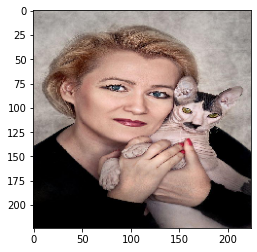

In [ ]:
print(y_train[109])
plt.imshow(X_train[109])

## Building CNN Model

In [ ]:
model = models.Sequential()
#first CNN layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(X_train[0].shape)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
#second CNN layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
#third CNN layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
#fourth CNN layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
#flatening the images before dense layers
model.add(Flatten())
#fully connected first layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
#fully connected second layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#fully connected final layer
model.add(Dense(6, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_6 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 109, 109, 128)     512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 512)      

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Applied Machine Learning Coursework/output/CNN_Sequential.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                                epochs=10,
                                validation_data = (X_test, y_test)
                                callbacks=callbacks_list
                                )

Epoch 1/10


ValueError: ignored

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show

## Creating model using builtin VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
# loading model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(X_train[0].shape))
# Adding new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(5, activation='softmax')(fc2)
# Define new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()


NameError: ignored

In [ ]:
#creating a checkpoint
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Applied Machine Learning Coursework/output/ResNet-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

#compiling the model
model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
#training the model
print('Training the VGG16 model now')
history = model.fit(X_train, y_train,
                                epochs=10,
                                validation_data = (X_test, y_test),
                                callbacks=callbacks_list
                                )

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show

##Creating ResNet50 model with augmentated data

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Input
data_augmentation = Sequential(
    [
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1)
    ]
)
# The augmentation is being made part of the model. Note that data augmentation is inactive at test time.
# Creating a model that includes the augmentation stage
input_shape = (X_train[0].shape)
inputs = keras.Input(shape=input_shape)
# Augmenting images
x = data_augmentation(inputs)
# Adding the rest of the model
model = keras.applications.ResNet50V2(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)
# Add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(5, activation='softmax')(flat1)
# Define new model
model = Model(inputs=inputs, outputs= outputs)
model.summary()
plot_model(model)

In [ ]:
def inception_block(x, filters):
    t1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    t2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    t2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', activation='relu')(t2)

    t3 = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    t3 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(t3)

    output = Concatenate()([t1, t2, t3])
    return output

input = Input(shape=(X_train[0].shape))
x = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = Conv2D(filters=64, kernel_size=1, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dropout(rate=0.4)(x)

x = Flatten()(x)
output = Dense(units=5, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.summary()
plot_model(model)

In [ ]:
#creating a checkpoint
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Applied Machine Learning Coursework/output/ResNet-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

#compiling the model
print('Training the GoogleNet model now')
optimizer = ['Adam', 'SGD']
epochs=[10,10]
for i in range(len(optimizer)):
    print('Using optimizer: ' + optimizer[i] + ', Epoch: ' + str(epochs[i]))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer[i], metrics=['accuracy'])
    #training the model
    history = model.fit(X_train, y_train, epochs=epochs[i] , validation_data=(X_test, y_test), callbacks=callbacks_list, shuffle=True)